# Imports


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura dos dados

In [127]:
dataset = pd.read_csv('dataset/House_Rent_Dataset.csv')
dataset.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


# Preprocessamento

## Análise expliratória dos dados
Informações gerais dos dados
- shape
- colunas
- informações
- descrição dos dados
- verificação de presença de valores
- dados duplicados

Gráficos
- Gráfico de barras para o número de casas disponíveis para aluguel em cada cidade
- Gráfico de barras em diferentes tipos de status de mobiliário
- Lote de Barras em Diferentes Tipos de Inquilinos Preferidos
- Gráfico de pizza em cidades para verificar a distribuição
- Gráfico de dispersão sobre aluguéis de casas versus tamanhos de casas
- Lote de terreno para aluguel na cidade ou em casa
- Histograma sobre tamanhos de casas
- Distribuição de diferentes número de cômodos disponíveis no conjunto de dados
- Distribuição de diferentes números de banheiros disponíveis no conjunto de dados
- Mapa de calor em número de cômodos vs. Tipo de área



### Informações gerais dos dados

In [ ]:
dataset.shape

In [ ]:
dataset.columns

In [ ]:
dataset.info()

In [133]:
dataset.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [ ]:
dataset.isnull().sum()

In [ ]:
print(f"Duplicados: {int(dataset.duplicated().sum())}")

### Gráficos

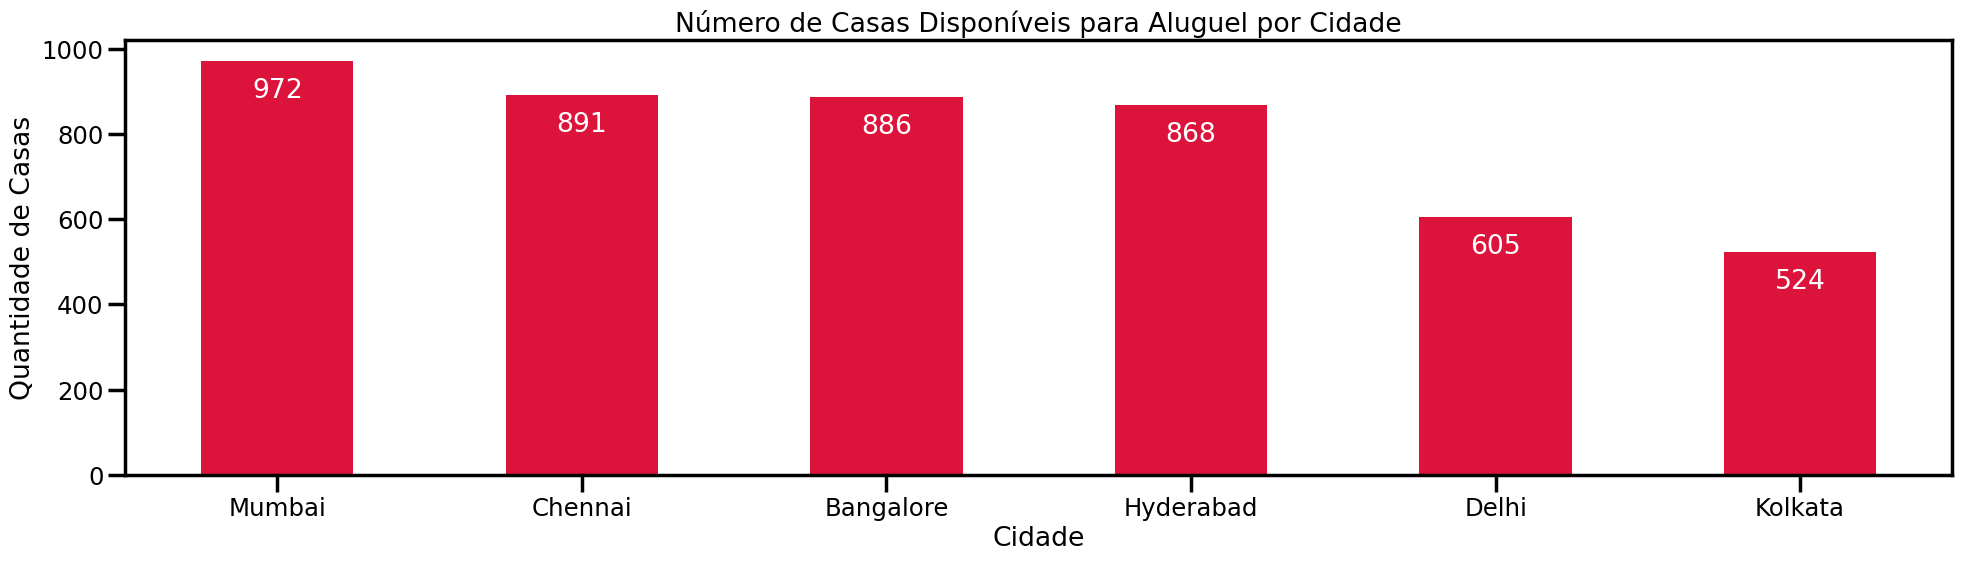

In [100]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))
ax = dataset["City"].value_counts().plot(kind = 'bar',
                                         color = "crimson",
                                         rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 100),
                ha = 'center',
                va = 'bottom',
                color = 'white')
    

plt.title('Número de Casas Disponíveis para Aluguel por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Quantidade de Casas')

plt.tight_layout()

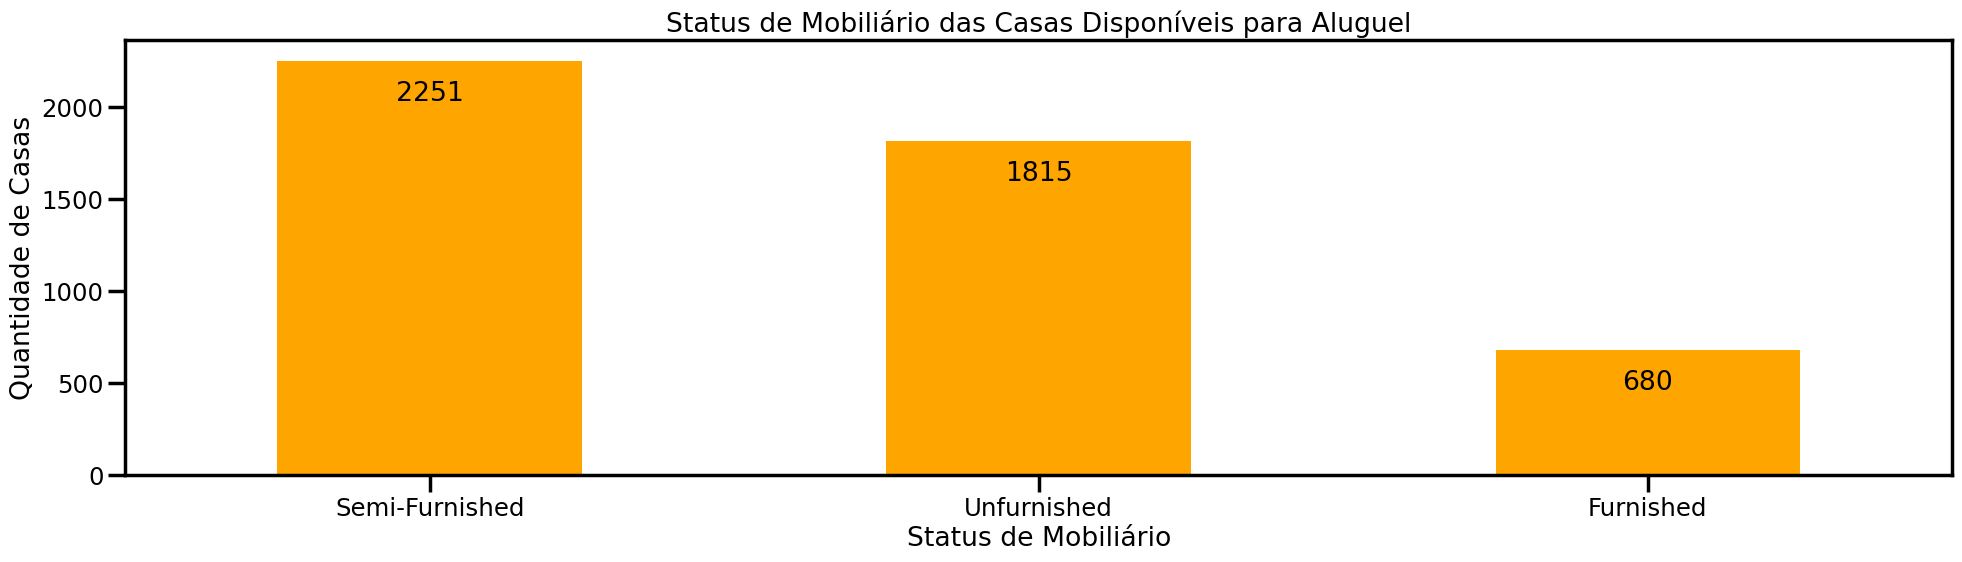

In [102]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))
ax = dataset["Furnishing Status"].value_counts().plot(kind = 'bar',
                                                      color = "Orange",
                                                      rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 250),
                ha = 'center',
                va = 'bottom',
                color = 'Black')

plt.title('Status de Mobiliário das Casas Disponíveis para Aluguel')
plt.xlabel('Status de Mobiliário')
plt.ylabel('Quantidade de Casas')

plt.tight_layout()

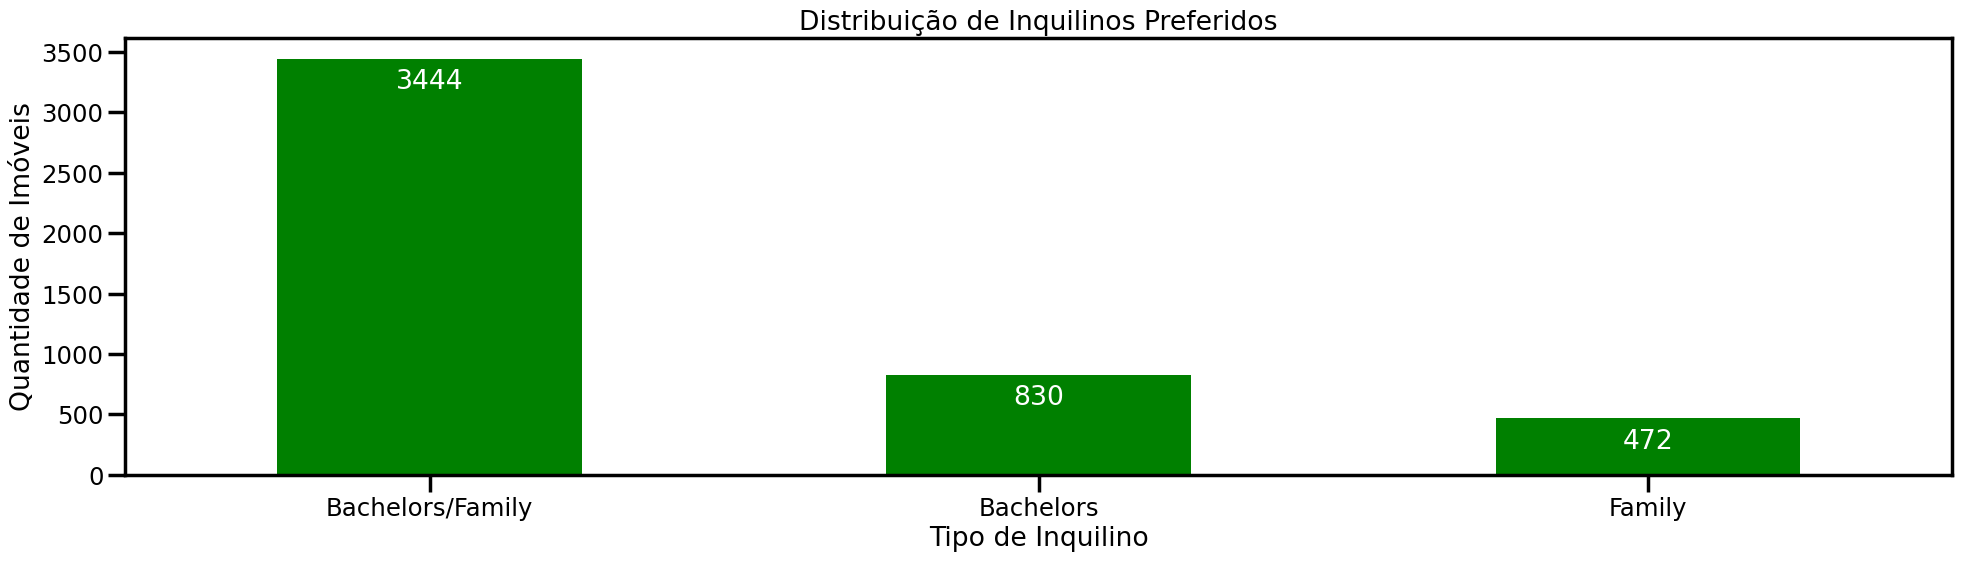

In [103]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))
ax = dataset["Tenant Preferred"].value_counts().plot(kind = 'bar', color = "Green", rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 300),
                ha = 'center',
                va = 'bottom',
                color = 'White')

plt.title('Distribuição de Inquilinos Preferidos')
plt.xlabel('Tipo de Inquilino')
plt.ylabel('Quantidade de Imóveis')

plt.tight_layout()

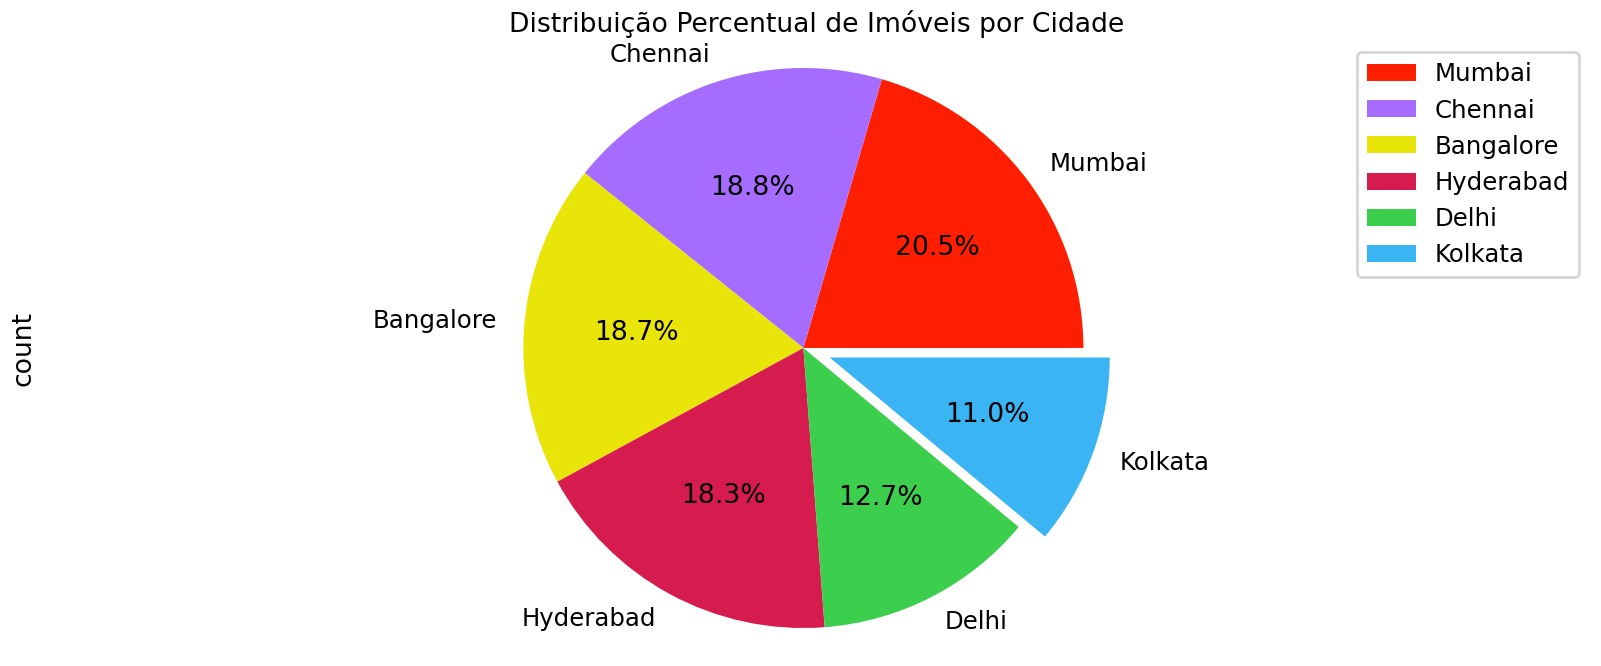

In [104]:
plt.figure(figsize = (20, 8))
counts = dataset["City"].value_counts()
explode = (0, 0, 0, 0, 0, 0.1)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E', '#3AB4F2']

counts.plot(kind = 'pie',
            colors = colors,
            explode = explode,
            autopct = '%1.1f%%')
plt.title('Distribuição Percentual de Imóveis por Cidade')
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

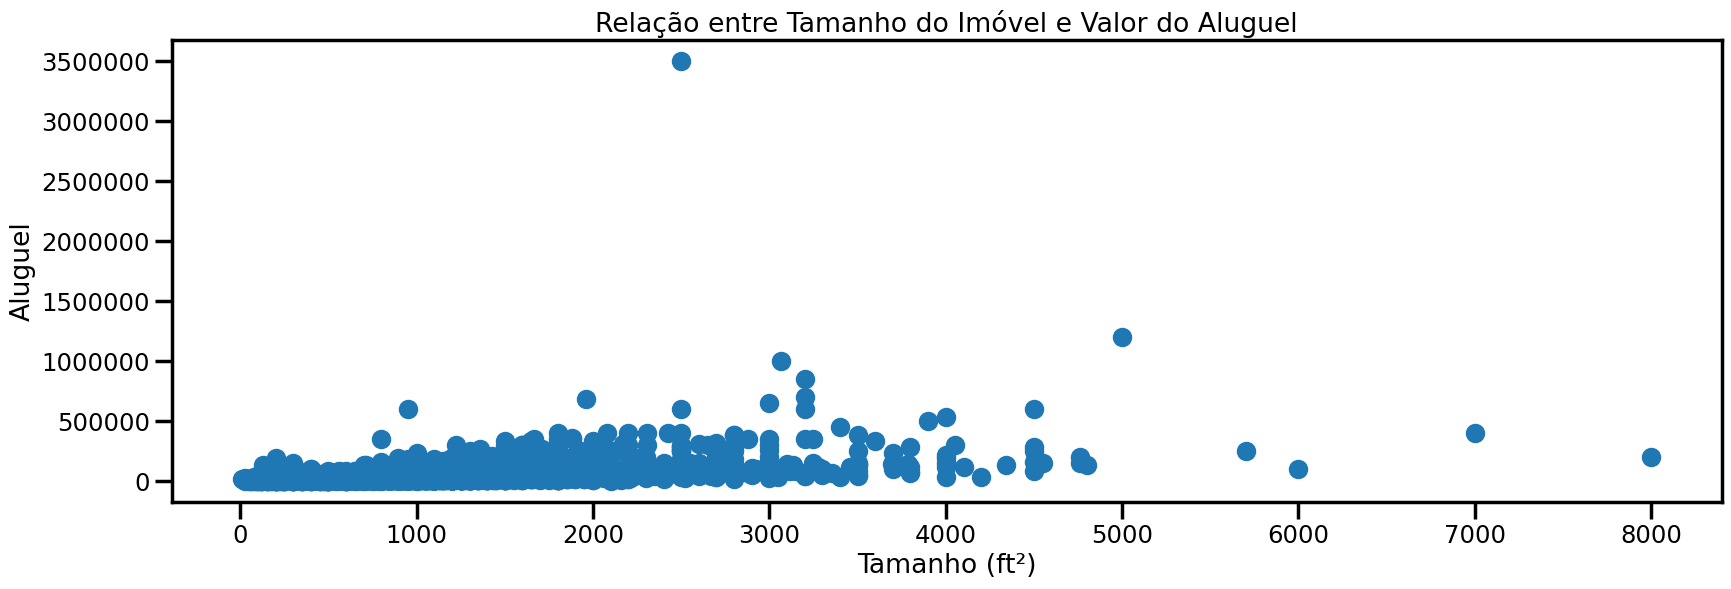

In [ ]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
plt.scatter(dataset["Size"], dataset["Rent"])
plt.title('Relação entre Tamanho do Imóvel e Valor do Aluguel')
plt.xlabel("Tamanho (m²)")
plt.ylabel("Aluguel");

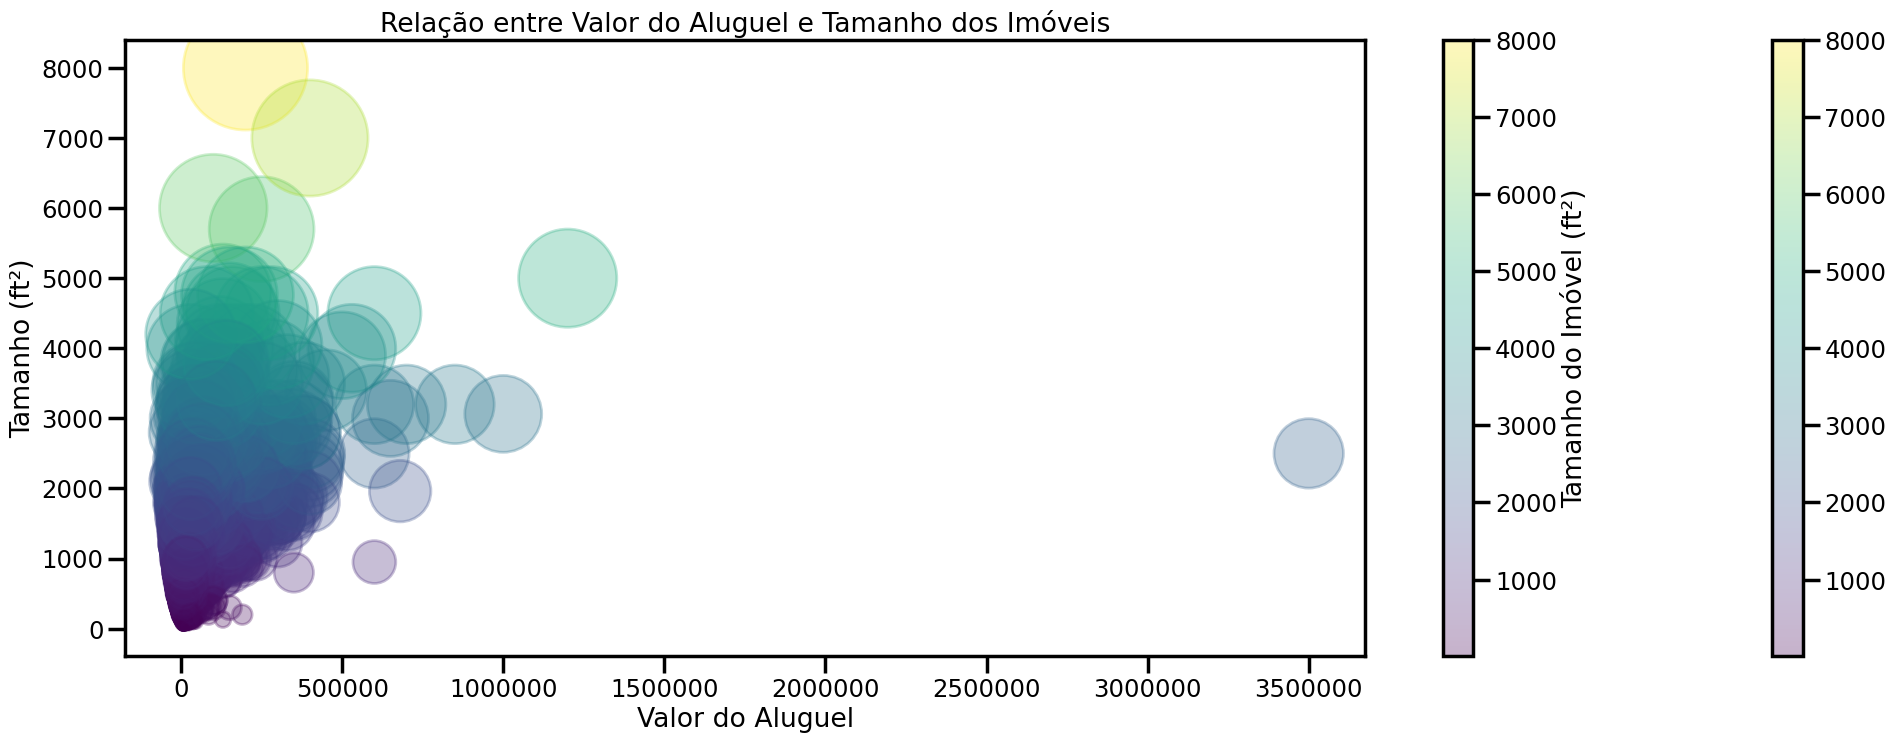

In [ ]:
x = dataset["Rent"]
y = dataset["Size"]
colors = dataset["Size"]
sizes = dataset["Size"]

plt.figure(figsize = (25, 8))
plt.ticklabel_format(style = 'plain')
plt.scatter(x, y, c = colors, s = sizes, alpha = 0.3, cmap = 'viridis')
plt.colorbar();

plt.title('Relação entre Valor do Aluguel e Tamanho dos Imóveis')
plt.xlabel('Valor do Aluguel')
plt.ylabel('Tamanho (m²)')
plt.colorbar(label='Tamanho do Imóvel (m²)');

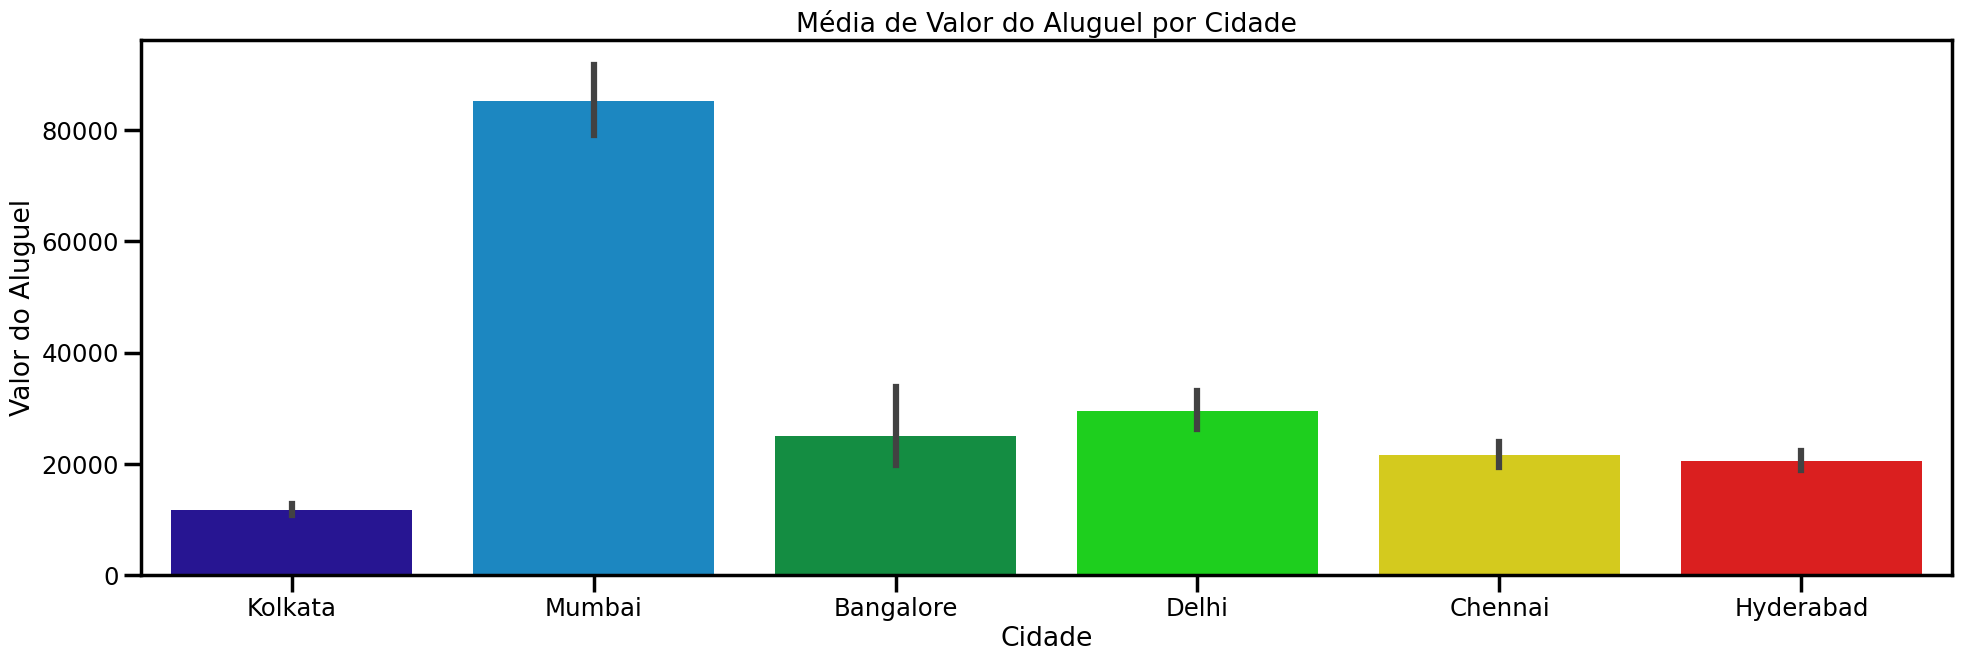

In [107]:
plt.figure(figsize = (20, 7))
sns.barplot(x = dataset["City"], 
            y = dataset["Rent"], 
            hue = dataset["City"],
            palette = "nipy_spectral",
            legend = False);

plt.title('Média de Valor do Aluguel por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Valor do Aluguel')
plt.xticks(rotation = 0)
plt.tight_layout()


Text(0, 0.5, 'Frequência')

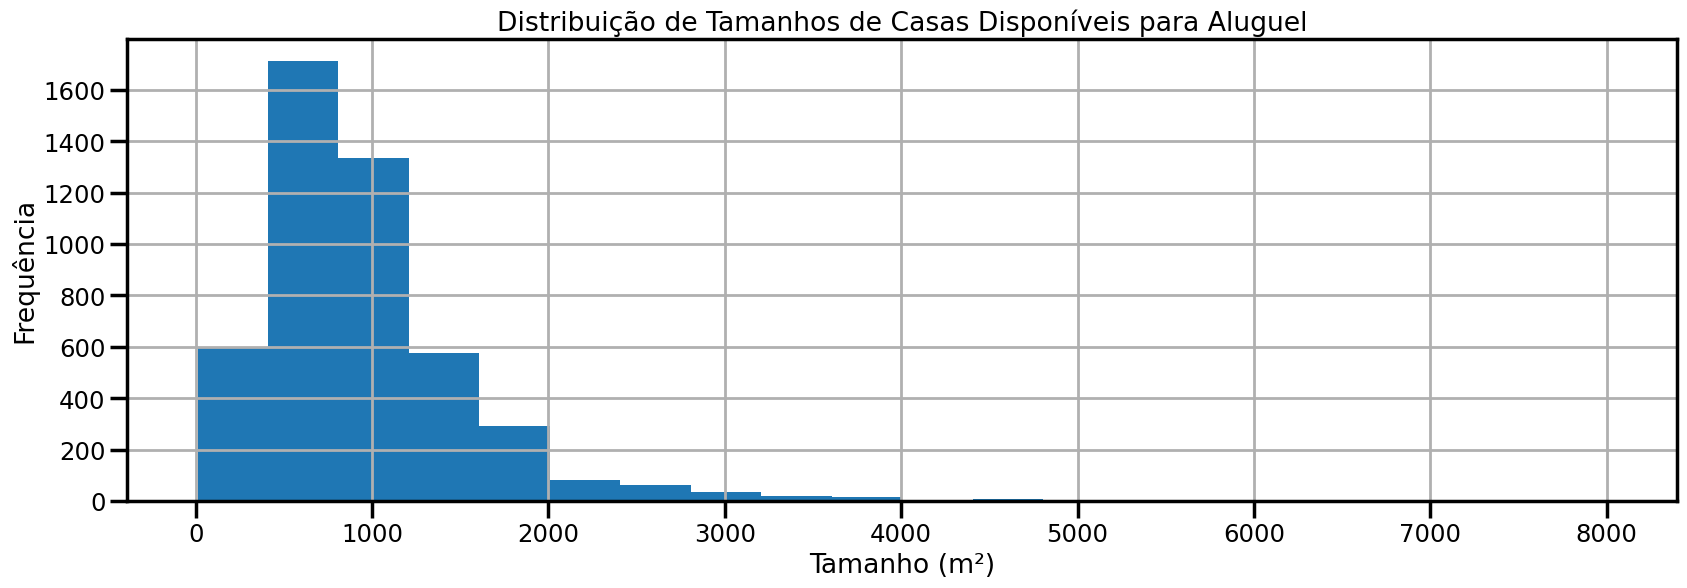

In [109]:

n_bins = 20
plt.figure(figsize = (20, 6))
dataset["Size"].hist(bins = n_bins);

plt.title('Distribuição de Tamanhos de Casas Disponíveis para Aluguel')
plt.xlabel('Tamanho (m²)')
plt.ylabel('Frequência')


Text(0, 0.5, 'Quantidade de Imóveis')

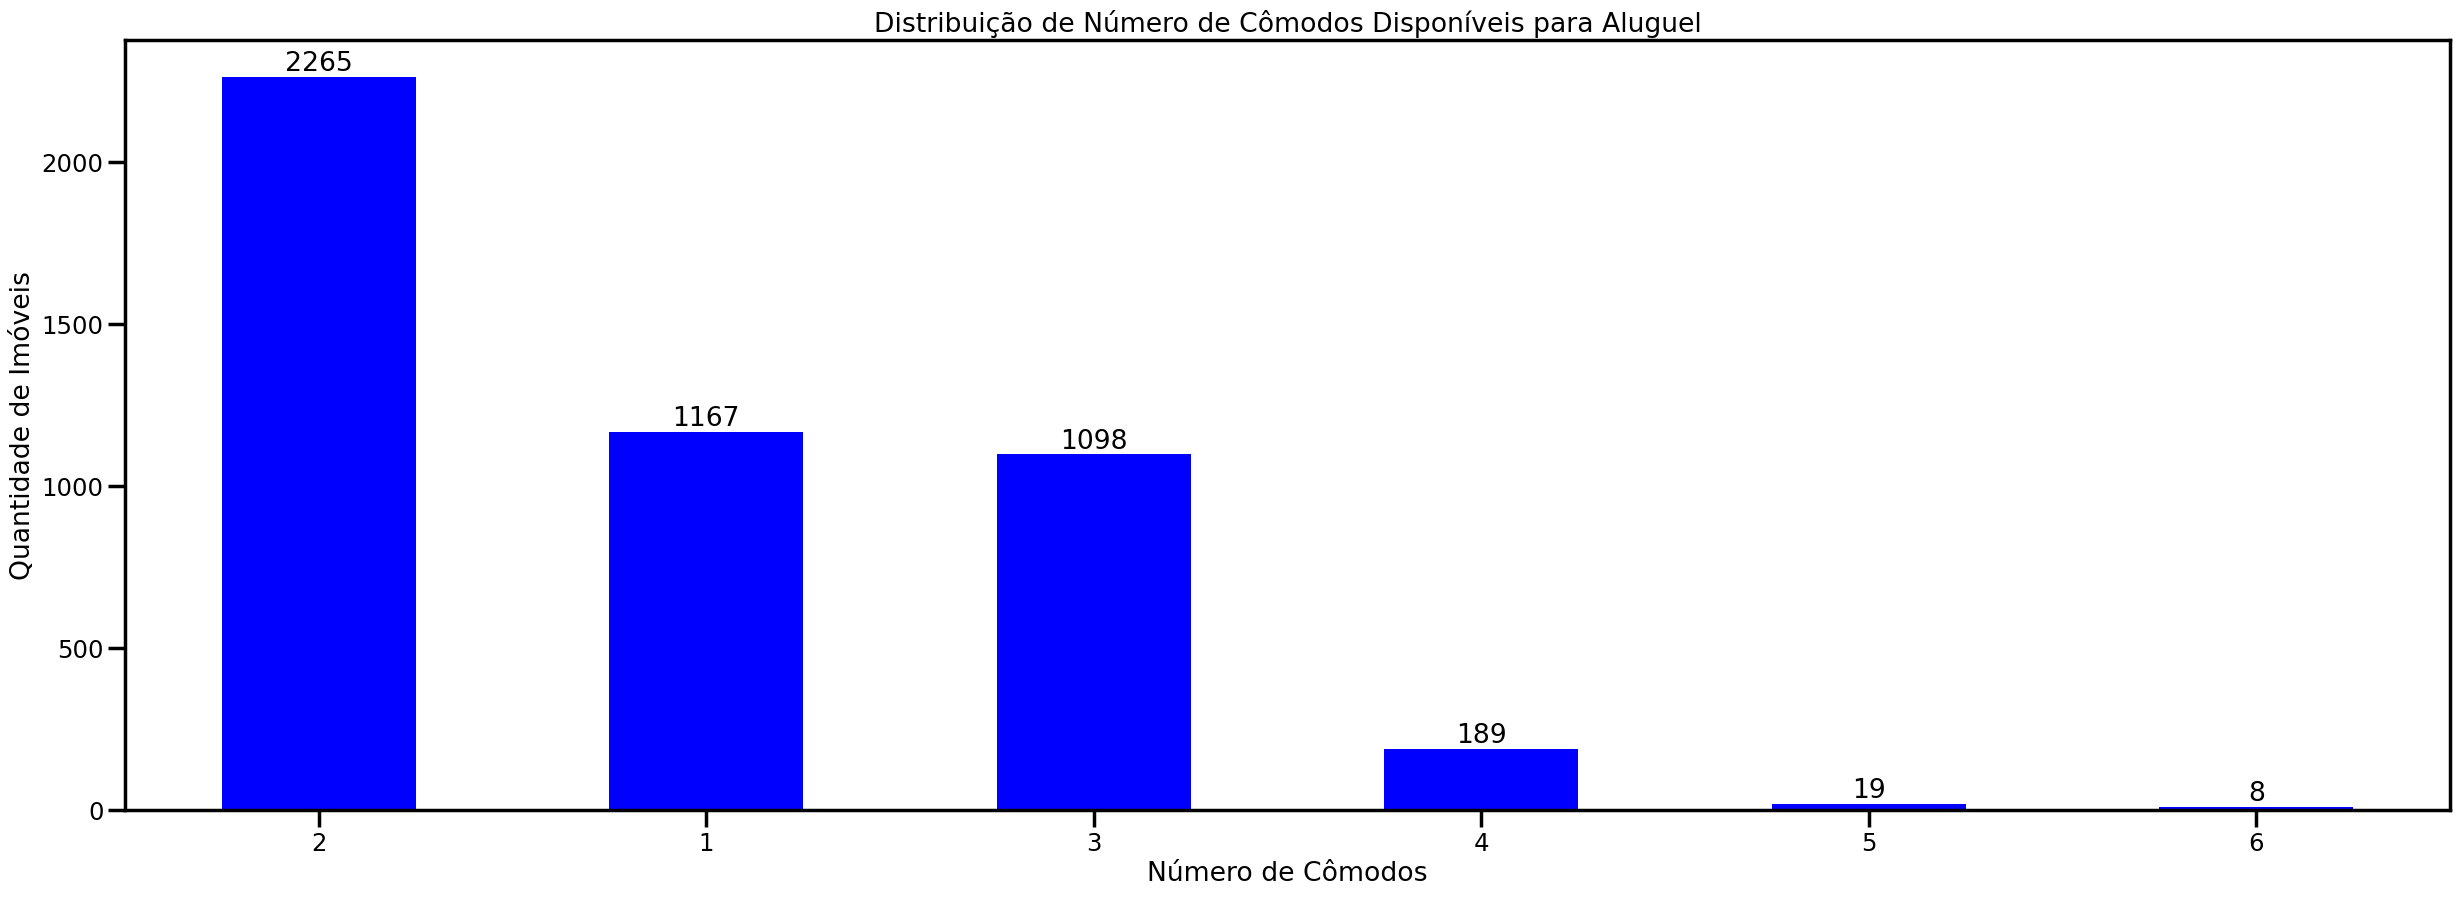

In [119]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (30, 10))
ax = dataset["BHK"].value_counts().plot(kind = 'bar',
                                        color = "Blue",
                                        rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

plt.title('Distribuição de Número de Cômodos Disponíveis para Aluguel')
plt.xlabel('Número de Cômodos')
plt.ylabel('Quantidade de Imóveis')

Text(0, 0.5, 'Quantidade de Imóveis')

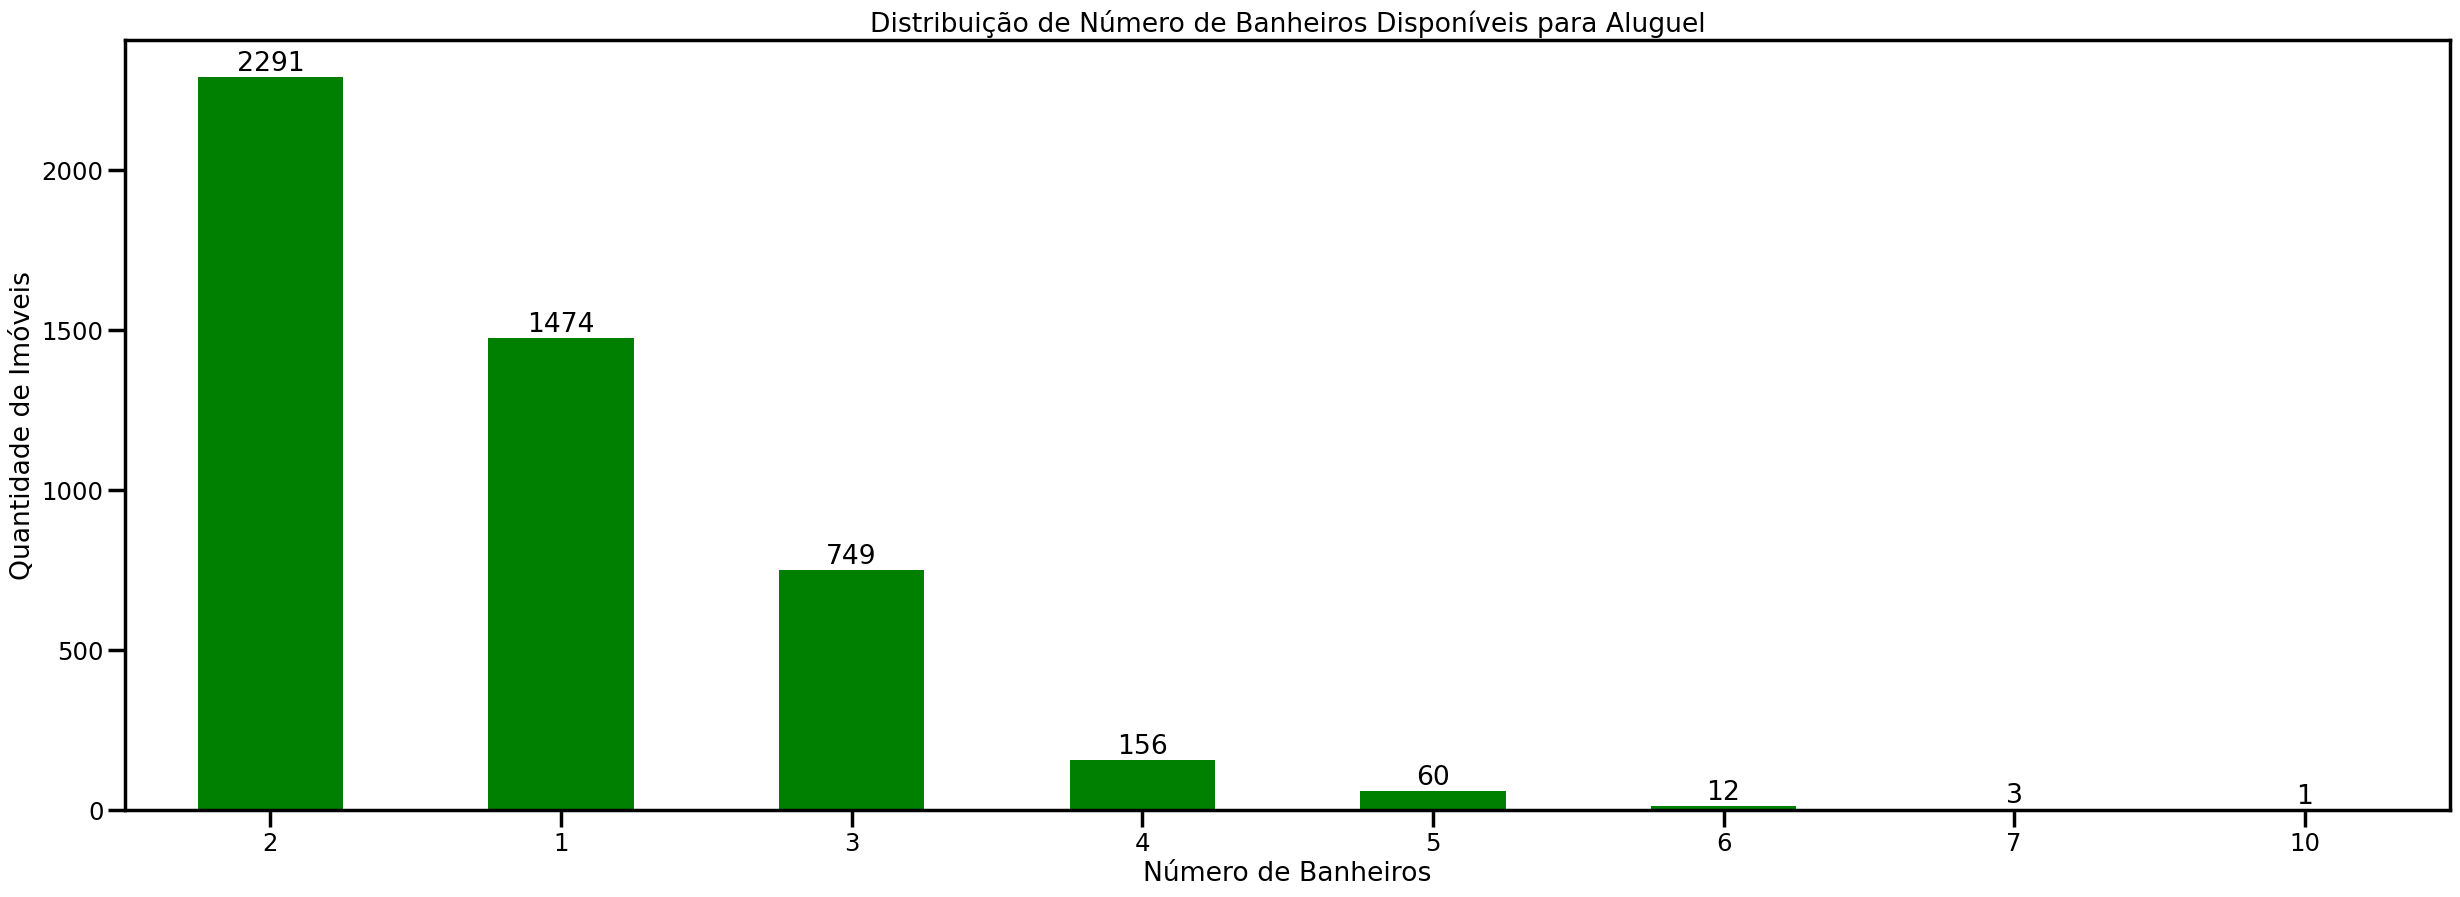

In [120]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (30, 10))
ax = dataset["Bathroom"].value_counts().plot(kind = 'bar',
                                             color = "Green",
                                             rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

plt.title('Distribuição de Número de Banheiros Disponíveis para Aluguel')
plt.xlabel('Número de Banheiros')
plt.ylabel('Quantidade de Imóveis')

Text(198.91666666666669, 0.5, 'Número de Cômodos')

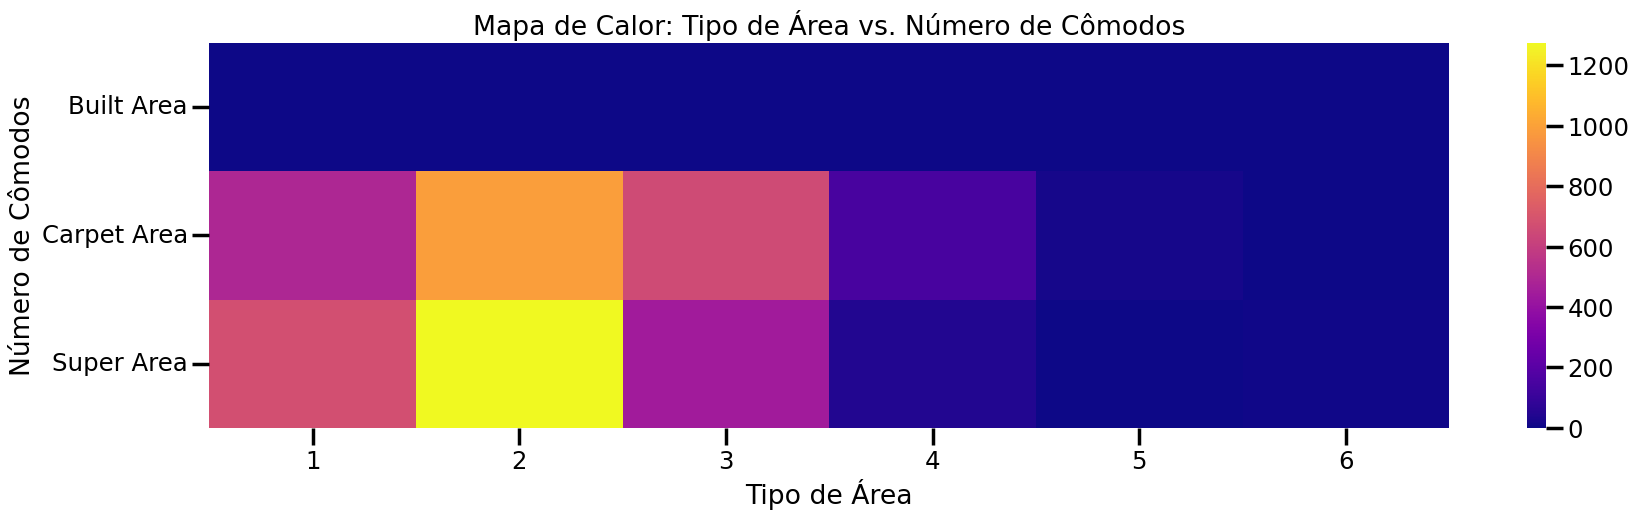

In [121]:
plt.figure(figsize = (20, 5))
colormap = plt.cm.plasma
sns.heatmap(pd.crosstab(dataset["Area Type"],
                        dataset["BHK"]),
                        cmap = colormap);

plt.title('Mapa de Calor: Tipo de Área vs. Número de Cômodos')
plt.xlabel('Tipo de Área')
plt.ylabel('Número de Cômodos')

### Remoção de outliers


In [135]:
dataset_filtrado = dataset.copy()
print("Número de linhas antes da remoção dos outliers:", len(dataset_filtrado))
colunas_para_verificar = ['Rent', 'Size', 'Bathroom', 'BHK']

for col in colunas_para_verificar:
    mean = dataset_filtrado[col].mean()
    std = dataset_filtrado[col].std()

    dataset_filtrado = dataset_filtrado[(dataset_filtrado[col] >= mean - 3*std) & (dataset_filtrado[col] <= mean + 3*std)]

print("Número de linhas após remoção dos outliers:", len(dataset_filtrado))

Número de linhas antes da remoção dos outliers: 4746
Número de linhas após remoção dos outliers: 4573


### Seleção de atributos